In [40]:
#
# NCFApp
# New Customers Forecast Application
# Programma creato per il forecast dei clienti
# 

import numpy             as np   # libreria per la gestione dei numeri
import pandas            as pd   # libreria per la gestione del file csv
import seaborn           as sb   # libreria per la costruzione di grafici
import matplotlib.pyplot as plt  # libreria ausiliaria per la costruzione di grafici
import Tkinter           as tk   # libreria per l'interfaccia grafica
import PIL                       # libreria per la gestione delle immagini
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.seasonal  import seasonal_decompose

# Carica il dataframe dei dati dal file csv
df_sstor = pd.read_csv('NCFAdati.csv',sep=',')
# Converte la prima colonna 'MESE' da stringa a data
df_sstor['MESE']=pd.to_datetime(df_sstor['MESE'],format='%Y/%m')

In [3]:
# Funzione che espone l'ultimo consuntivo caricato
def Lastcons():
    df_mesi = df_sstor['MESE']
    return max(df_mesi)

# Funzione che prepara un grafico e lo salva in una figura
def SimplePlot(SeriePandas=None,LabelofSerie=None):
    plt.plot(SeriePandas,label=LabelofSerie)
    plt.legend()
    return plt.figure()



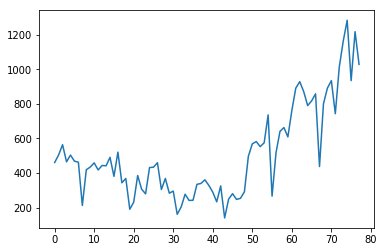

In [47]:
SP = df_sstor['FL_IMP']
a=plt.plot(SP)
plt.show(a)

In [26]:
print help(st)

Help on module statsmodels.tsa.stattools in statsmodels.tsa:

NAME
    statsmodels.tsa.stattools - Statistical tools for time series analysis

FILE
    /home/kaidan/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/stattools.py

FUNCTIONS
    acf(x, unbiased=False, nlags=40, qstat=False, fft=False, alpha=None, missing='none')
        Autocorrelation function for 1d arrays.
        
        Parameters
        ----------
        x : array
           Time series data
        unbiased : bool
           If True, then denominators for autocovariance are n-k, otherwise n
        nlags: int, optional
            Number of lags to return autocorrelation for.
        qstat : bool, optional
            If True, returns the Ljung-Box q statistic for each autocorrelation
            coefficient.  See q_stat for more information.
        fft : bool, optional
            If True, computes the ACF via FFT.
        alpha : scalar, optional
            If a number is given, the confidence intervals 

In [48]:
# Funzione che data una serie ne calcola il forecast
def Forecast(SeriePandas=None):
    #Elimina eventuali spazi vuoti
    SeriePandas = SeriePandas.dropna()
    #Calcola media mobile e deviazione standard su 12 periodi
    rolmean = SeriePandas.rolling(window=12,center=False).mean()
    rolstd  = SeriePandas.rolling(window=12,center=False).std()
    
    
    plt.plot(SP)
    plt.plot(rolmean)
    plt.title('Original series and Rolling Mean')
    plt.show()
    plt.plot(rolstd)
    plt.title('Rolling Standard Deviation')
    plt.show()
    
    
    dftest = adfuller(SeriePandas, autolag='AIC')
    print dftest
    print 'Results of Dickey-Fuller Test:'
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput
    
    
    decomposition = seasonal_decompose(SeriePandas.dropna())

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.subplot(411)
    plt.plot(SeriePandas, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    #worklist=[]
    #for i in range(12,len(SeriePandas)):
    #    worklist.insert(i-12,SeriePandas[i]-SeriePandas[i-12])
    #avgtrend = np.mean(worklist)/12
    
    #trendlist=[]
    #for i in range(0,len(SeriePandas)-1):
    #    trendlist.insert(i,i*avgtrend)
        
    #worklist1=[]
    #for i in range(0,len(SeriePandas)-1):
    #    worklist1.insert(i,SeriePandas[i]-trendlist[i])
    #constant = np.mean(worklist1)
    
    #worklist2 = worklist1-constant
    
    #return worklist2,constant


<class 'pandas.core.series.Series'>
0    461
1    505
2    564
3    465
4    504
Name: FL_IMP, dtype: int64


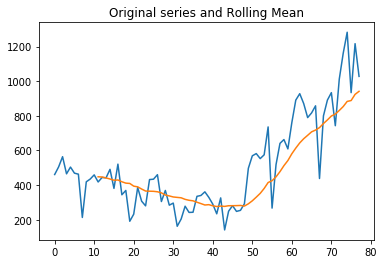

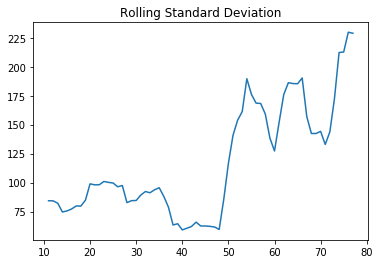

(0.27713736568232361, 0.97627090209061373, 12, 65, {'5%': -2.9071540828402367, '1%': -3.5352168748293127, '10%': -2.5911025443786984}, 787.29046527473281)
Results of Dickey-Fuller Test:
Test Statistic                  0.277137
p-value                         0.976271
#Lags Used                     12.000000
Number of Observations Used    65.000000
Critical Value (5%)            -2.907154
Critical Value (1%)            -3.535217
Critical Value (10%)           -2.591103
dtype: float64


AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

In [49]:
print type(SP)
print SP.head()
print Forecast(SP)

In [43]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True)
    Seasonal decomposition using moving averages
    
    Parameters
    ----------
    x : array-like
        Time series
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not  a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If False, the filter coefficients are for past values only.
    
 

In [4]:
class Application(tk.Frame):
    def __init__(self, master=None):
        tk.Frame.__init__(self, master)
        self.grid()
        self.createWidgets()

    def createWidgets(self):
        self.imglogo = PIL.Image.open('Logo.jpg')
        self.imgA = self.imglogo.resize(size=(600,150))
        self.imgB = PIL.ImageTk.PhotoImage(self.imgA)
        self.canvas1 = tk.Canvas(self,width=600,height=150)
        self.canvas1.create_image(300,75,image=self.imgB)
        self.canvas1.grid()
        
        self.label = tk.Label(text = 'Last consuntive '+Lastcons())
        self.label.grid()
        
        self.quitButton = tk.Button(self, text='Quit', background='darkred', command=self.quit)
        self.quitButton.grid()
        
    def quit(self):
        self.destroy()
        return 

app = Application()
app.master.title('New Customers Forecast Application - rel. 1.0 - (C) Gianni Zattoni')
app.mainloop()


AttributeError: 'module' object has no attribute 'ImageTk'

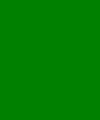

In [5]:
imA = PIL.Image.new(mode='RGB',size=(100,120),color='green')
imA

In [6]:
imglogo = PIL.Image.open('Logo.jpg')
imB = imglogo
#imB = PIL.ImageTk.PhotoImage(imglogo)
label = tk.Label(image=imB)
label.grid()

TclError: image "<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x7F301B706710>" doesn't exist

In [7]:
# Frame principale
class Application(tk.Frame):
    def __init__(self, master=None):
        tk.Frame.__init__(self, master)
        self.grid()
        self.createWidgets()

    def createWidgets(self):
        
        self.imglogo = PIL.Image.open('Logo.jpg')
        self.imgA = self.imglogo.resize(size=(600,150))
        self.imgB = PIL.ImageTk.PhotoImage(self.imgA)
        self.canvas1 = tk.Canvas(self,width=600,height=150)
        self.canvas1.create_image(300,75,image=self.imgB)
        self.canvas1.grid()
        
        self.label = tk.Label(text = 'Last consuntive '+Lastcons())
        self.label.grid()
        
        self.quitButton = tk.Button(self, text='Quit', command=self.quit)
        self.quitButton.grid()
        
    def quit(self):
        self.destroy()
        return 

app = Application()
app.master.title('New Customers Forecast Application - rel. 1.0 - (C) Gianni Zattoni')
app.mainloop()


AttributeError: 'module' object has no attribute 'ImageTk'

In [3]:
print Lastcons()

2017/06


In [27]:
help('PIL.ImageTk')

Help on module PIL.ImageTk in PIL:

NAME
    PIL.ImageTk

FILE
    /home/kaidan/anaconda2/lib/python2.7/site-packages/PIL/ImageTk.py

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # a Tk display interface
    #
    # History:
    # 96-04-08 fl   Created
    # 96-09-06 fl   Added getimage method
    # 96-11-01 fl   Rewritten, removed image attribute and crop method
    # 97-05-09 fl   Use PyImagingPaste method instead of image type
    # 97-05-12 fl   Minor tweaks to match the IFUNC95 interface
    # 97-05-17 fl   Support the "pilbitmap" booster patch
    # 97-06-05 fl   Added file= and data= argument to image constructors
    # 98-03-09 fl   Added width and height methods to Image classes
    # 98-07-02 fl   Use default mode for "P" images without palette attribute
    # 98-07-02 fl   Explicitly destroy Tkinter image objects
    # 99-07-24 fl   Support multiple Tk interpreters (from Greg Couch)
    # 99-07-26 fl   Automatically hook into Tkinter (if possible)
    #

In [24]:
# Funzione che prepara un grafico e lo salva in una figura
def SimplePlot(SeriePandas=None,LabelofSerie=None):
    plt.plot(SeriePandas,label=LabelofSerie)
    plt.legend()
    plt.show()
    return plt.figure()

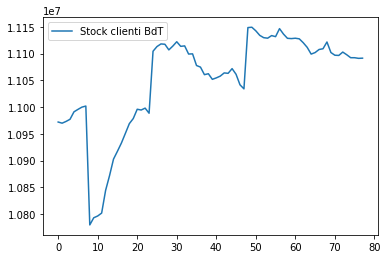

In [25]:
SimplePlot(df_totbdt['ST_BDT'],'Stock clienti BdT')

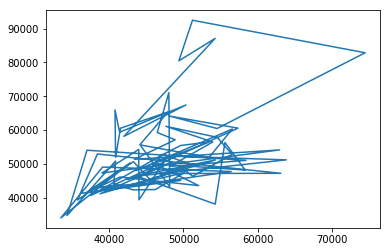

In [17]:
plt.plot(df_totbdt['CP_BDT'],df_totbdt['FL_BDT'])
plt.show()
#plt.gcf().canvas.draw()
fig = plt.figure()

In [19]:
fig
print fig

Figure(432x288)


In [9]:
import PIL

In [10]:
# create the canvas, size in pixels
canvas = tk.Canvas(width=500, height=200, bg='black')

# pack the canvas into a frame/form
canvas.grid() #expand=YES, fill=BOTH)

# load the .gif image file
logo = PIL.Image.open("Logo.jpg")
gif1 = PIL.ImageTk.PhotoImage(logo)

# put gif image on canvas
# pic's upper left corner (NW) on the canvas is at x=50 y=10
canvas.create_image(50, 10, image=gif1, anchor=N)

AttributeError: 'module' object has no attribute 'ImageTk'

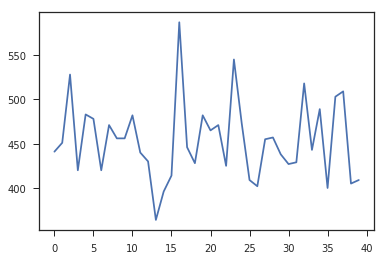

<class 'matplotlib.figure.Figure'>


IndexError: tuple index out of range

In [31]:

# prova di visualizzazione del grafico

#sb.set(style="ticks")
#pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
#pos -= pos[:, 0, np.newaxis]
#step = np.tile(range(5), 20)
#walk = np.repeat(range(20), 5)

# Initialize a grid of plots with an Axes for each walk
#grid = sb.FacetGrid(d_somma, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
#grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
#grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
#         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)



print type(fig)
graphic = tk.Canvas(app)
q = graphic.create_image(x=1, y=1, image=fig) #canvas.get_tk_widget().grid(row=1,column=24)
canvas.draw()


# create the canvas, size in pixels
#canvas = Canvas(width=300, height=200, bg='black')

# pack the canvas into a frame/form
#canvas.pack(expand=YES, fill=BOTH)

# load the .gif image file
#gif1 = PhotoImage(file='small_globe.gif')

# put gif image on canvas
# pic's upper left corner (NW) on the canvas is at x=50 y=10
#canvas.create_image(50, 10, image=gif1, anchor=N

In [ ]:
import 